# Code to generate all figures on ar events used in the paper


In [ ]:
%load_ext autoreload
%autoreload 2

In [26]:
# setup all the imports
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import seaborn as sns
from extremeweatherbench import evaluate, calc, cases, defaults, inputs, metrics, regions, derived
sns.set_theme(style='whitegrid')
import shapely
from pathlib import Path
import multiprocessing
import xarray as xr
from matplotlib.lines import Line2D

# make the basepath - change this to your local path
basepath = Path.home() / "extreme-weather-bench-paper" / ""
basepath = str(basepath) + "/"

import src.plots.paper_plotting as pp  # noqa: E402
import src.plots.atmospheric_river_utils as ar_plot  # noqa: E402


In [3]:
# make a global color palatte so things are consistent across plots
sns_palette = sns.color_palette("tab10")
sns.set_style("whitegrid")

accessible_colors = [
    "#3394D6",  # blue
    "#E09000",  #  orange "#E69F00",  # orange
    "#A15A7E",  # "#CC79A7",  # reddish purple
    "#CC4A4A",  #  vermillion"#D55E00",  # vermillion
    "#A0A0A0",  # Grey "#000000",  # black
    "#B2B24D",  # Olive
    "#33B890",  # bluish green
    "#78C6F1",  # sky blue
    "#F0E442",  # yellow
]

# defaults for plotting
fourv2_style = {'color': accessible_colors[0]}
gc_style = {'color': accessible_colors[2]}
pangu_style = {'color': accessible_colors[3]}
hres_style = {'color': 'black'}

# the group styles and settings so that we can just easily grab them for the plots and they are globally consistent

era5_group_style = {'linestyle':'--', 'marker':'s', 'group':'ERA5'}
gfs_group_style = {'linestyle':':', 'marker':'d', 'group':'GFS'}
global_group_style = {'linestyle':'--', 'marker':'*', 'group':'Global'}
hres_group_style = {'linestyle':'-', 'marker':'.', 'group':'HRES'}

# settings for the different models
fourv2_gfs_cira_settings = {'forecast_source':'CIRA FOURv2 GFS', 'label_str': 'ForecastNet V2'} 
gc_gfs_cira_settings = {'forecast_source':'CIRA GC GFS', 'label_str': 'GraphCast'} 
pangu_gfs_cira_settings = {'forecast_source':'CIRA PANG GFS', 'label_str': 'Pangu Weather'} 

hres_ifs_settings = {'forecast_source':'ECMWF HRES', 'label_str': 'HRES'} 



In [4]:
# load in all of the events in the yaml file
print("loading in the events yaml file")
ewb_cases = cases.load_ewb_events_yaml_into_case_collection()
# build out all of the expected data to evalate the case
# this will not be a 1-1 mapping with ewb_cases because there are multiple data sources
# to evaluate for some cases
# for example, a heat/cold case will have both a case operator for ERA-5 data and GHCN
case_operators = cases.build_case_operators(
    ewb_cases, defaults.get_brightband_evaluation_objects()
)


loading in the events yaml file


# load results from the pickles

In [5]:
# load the results back in
fourv2_ar_results = pd.read_pickle(basepath + 'saved_data/fourv2_ar_results.pkl')
pang_ar_results = pd.read_pickle(basepath + 'saved_data/pang_ar_results.pkl')
hres_ar_results = pd.read_pickle(basepath + 'saved_data/hres_ar_results.pkl')
gc_ar_results = pd.read_pickle(basepath + 'saved_data/gc_ar_results.pkl')


# plotting and subsetting code at the global level

In [6]:
fourv2_gfs_era5_settings_csi = fourv2_gfs_cira_settings | fourv2_style | era5_group_style   
gc_gfs_era5_settings_csi  = gc_gfs_cira_settings | gc_style | era5_group_style
pangu_gfs_era5_settings_csi = pangu_gfs_cira_settings | pangu_style | era5_group_style
hres_era5_settings_csi = hres_ifs_settings | hres_style | hres_group_style

# grab the ar CSI results
fourv2_ar_plot_csi = pp.subset_results_to_xarray(results_df=fourv2_ar_results, 
    forecast_source=fourv2_gfs_cira_settings['forecast_source'], 
    target_source='ERA5', metric='CriticalSuccessIndex', init_time='zeroz')
gc_ar_plot_csi = pp.subset_results_to_xarray(results_df=gc_ar_results, 
    forecast_source=gc_gfs_cira_settings['forecast_source'], 
    target_source='ERA5', metric='CriticalSuccessIndex', init_time='zeroz')
pangu_ar_plot_csi  = pp.subset_results_to_xarray(results_df=pang_ar_results, 
    forecast_source=pangu_gfs_cira_settings['forecast_source'], 
    target_source='ERA5', metric='CriticalSuccessIndex', init_time='zeroz')
hres_ar_plot_csi = pp.subset_results_to_xarray(results_df=hres_ar_results, 
    forecast_source=hres_era5_settings_csi['forecast_source'], 
    target_source='ERA5', metric='CriticalSuccessIndex', init_time='zeroz')

# plot the results
ar_data_csi = [fourv2_ar_plot_csi, gc_ar_plot_csi, pangu_ar_plot_csi, hres_ar_plot_csi]
ar_settings_csi = [fourv2_gfs_era5_settings_csi, gc_gfs_era5_settings_csi, pangu_gfs_era5_settings_csi, hres_era5_settings_csi]

# grab the spatial displacement results
fourv2_ar_plot_sd = pp.subset_results_to_xarray(results_df=fourv2_ar_results, 
    forecast_source=fourv2_gfs_cira_settings['forecast_source'], 
    target_source='ERA5', metric='spatial_displacement', init_time='zeroz')
gc_ar_plot_sd = pp.subset_results_to_xarray(results_df=gc_ar_results, 
    forecast_source=gc_gfs_cira_settings['forecast_source'], 
    target_source='ERA5', metric='spatial_displacement', init_time='zeroz')
pangu_ar_plot_sd  = pp.subset_results_to_xarray(results_df=pang_ar_results, 
    forecast_source=pangu_gfs_cira_settings['forecast_source'], 
    target_source='ERA5', metric='spatial_displacement', init_time='zeroz')
hres_ar_plot_sd = pp.subset_results_to_xarray(results_df=hres_ar_results, 
    forecast_source=hres_era5_settings_csi['forecast_source'], 
    target_source='ERA5', metric='spatial_displacement', init_time='zeroz')

ar_data_sd = [fourv2_ar_plot_sd, gc_ar_plot_sd, pangu_ar_plot_sd, hres_ar_plot_sd]
ar_settings_sd = [fourv2_gfs_era5_settings_csi, gc_gfs_era5_settings_csi, 
    pangu_gfs_era5_settings_csi, hres_era5_settings_csi]

# grab the early signal results
# fourv2_ar_plot_es = pp.subset_results_to_xarray(results_df=fourv2_ar_results, 
#     forecast_source=fourv2_gfs_cira_settings['forecast_source'], 
#     target_source='ERA5', metric='EarlySignal', init_time='zeroz')
# gc_ar_plot_es = pp.subset_results_to_xarray(results_df=gc_ar_results, 
#     forecast_source=gc_gfs_cira_settings['forecast_source'], 
#     target_source='ERA5', metric='EarlySignal', init_time='zeroz')
# pangu_ar_plot_es  = pp.subset_results_to_xarray(results_df=pang_ar_results, 
#     forecast_source=pangu_gfs_cira_settings['forecast_source'], 
#     target_source='ERA5', metric='EarlySignal', init_time='zeroz')
# hres_ar_plot_es = pp.subset_results_to_xarray(results_df=hres_ar_results, 
#     forecast_source=hres_era5_settings_csi['forecast_source'], 
#     target_source='ERA5', metric='EarlySignal', init_time='zeroz')

# ar_data_es = [fourv2_ar_plot_es, gc_ar_plot_es, pangu_ar_plot_es, hres_ar_plot_es]
# ar_settings_es = [fourv2_gfs_era5_settings_csi, gc_gfs_era5_settings_csi, 
#     pangu_gfs_era5_settings_csi, hres_era5_settings_csi]




In [ ]:
step1 = fourv2_ar_results[fourv2_ar_results['metric'] == 'EarlySignal']
step2 = step1[step1['target_source'] == 'ERA5']
step3 = step2[step2['forecast_source'] == fourv2_gfs_cira_settings['forecast_source']]
step3 = step3.astype({"lead_time": "timedelta64[ns]"})
step4 = step3[step3["lead_time"].dt.seconds % 86400 == 0]
step5 = step4.set_index(["lead_time", "case_id_number"]).sort_index()
#step6 = step5.to_xarray()
step5


value init_time  \
lead_time case_id_number                    
0 days    95               True       NaN   
          95              False       NaN   
          95               True       NaN   
          95              False       NaN   
          95               True       NaN   
...                         ...       ...   
10 days   143             False       NaN   
          143             False       NaN   
          143             False       NaN   
          143             False       NaN   
          143             False       NaN   

                                              target_variable       metric  \
lead_time case_id_number                                                     
0 days    95              atmospheric_river_land_intersection  EarlySignal   
          95              atmospheric_river_land_intersection  EarlySignal   
          95              atmospheric_river_land_intersection  EarlySignal   
          95              atmospheric_river_land_intersection  EarlySignal   
          95              atmospheric_river_land_intersection  EarlySignal   
...                                                       ...          ...   
10 days   143             atmospheric_river_land_intersection  EarlySignal   
          143             atmospheric_river_land_intersection  EarlySignal   
          143             atmospheric_river_land_intersection  EarlySignal   
          143             atmospheric_river_land_intersection  EarlySignal   
          143             atmospheric_river_land_intersection  EarlySignal   

                          forecast_source target_source         event_type  
lead_time case_id_number                                                    
0 days    95              CIRA FOURv2 GFS          ERA5  atmospheric_river  
          95              CIRA FOURv2 GFS          ERA5  atmospheric_river  
          95              CIRA FOURv2 GFS          ERA5  atmospheric_river  
          95              CIRA FOURv2 GFS          ERA5  atmospheric_river  
          95              CIRA FOURv2 GFS          ERA5  atmospheric_river  
...                                   ...           ...                ...  
10 days   143             CIRA FOURv2 GFS          ERA5  atmospheric_river  
          143             CIRA FOURv2 GFS          ERA5  atmospheric_river  
          143             CIRA FOURv2 GFS          ERA5  atmospheric_river  
          143             CIRA FOURv2 GFS          ERA5  atmospheric_river  
          143             CIRA FOURv2 GFS          ERA5  atmospheric_river  

[11891 rows x 7 columns]

In [24]:
step1 = fourv2_ar_results[fourv2_ar_results['metric'] == 'CriticalSuccessIndex']
step2 = step1[step1['target_source'] == 'ERA5']
step3 = step2[step2['forecast_source'] == fourv2_gfs_cira_settings['forecast_source']]
step3 = step3.astype({"lead_time": "timedelta64[ns]"})
step4 = step3[step3["lead_time"].dt.seconds % 86400 == 0]
step5 = step4.set_index(["lead_time", "case_id_number"]).sort_index()
step5

value init_time  \
lead_time case_id_number                       
0 days    95              0.443624       NaN   
          96              0.351094       NaN   
          97              0.514086       NaN   
          98              0.396854       NaN   
          99              0.239631       NaN   
...                            ...       ...   
10 days   139             0.073115       NaN   
          140              0.20457       NaN   
          141             0.018265       NaN   
          142             0.000562       NaN   
          143                  0.0       NaN   

                                              target_variable  \
lead_time case_id_number                                        
0 days    95              atmospheric_river_land_intersection   
          96              atmospheric_river_land_intersection   
          97              atmospheric_river_land_intersection   
          98              atmospheric_river_land_intersection   
          99              atmospheric_river_land_intersection   
...                                                       ...   
10 days   139             atmospheric_river_land_intersection   
          140             atmospheric_river_land_intersection   
          141             atmospheric_river_land_intersection   
          142             atmospheric_river_land_intersection   
          143             atmospheric_river_land_intersection   

                                        metric  forecast_source target_source  \
lead_time case_id_number                                                        
0 days    95              CriticalSuccessIndex  CIRA FOURv2 GFS          ERA5   
          96              CriticalSuccessIndex  CIRA FOURv2 GFS          ERA5   
          97              CriticalSuccessIndex  CIRA FOURv2 GFS          ERA5   
          98              CriticalSuccessIndex  CIRA FOURv2 GFS          ERA5   
          99              CriticalSuccessIndex  CIRA FOURv2 GFS          ERA5   
...                                        ...              ...           ...   
10 days   139             CriticalSuccessIndex  CIRA FOURv2 GFS          ERA5   
          140             CriticalSuccessIndex  CIRA FOURv2 GFS          ERA5   
          141             CriticalSuccessIndex  CIRA FOURv2 GFS          ERA5   
          142             CriticalSuccessIndex  CIRA FOURv2 GFS          ERA5   
          143             CriticalSuccessIndex  CIRA FOURv2 GFS          ERA5   

                                 event_type  
lead_time case_id_number                     
0 days    95              atmospheric_river  
          96              atmospheric_river  
          97              atmospheric_river  
          98              atmospheric_river  
          99              atmospheric_river  
...                                     ...  
10 days   139             atmospheric_river  
          140             atmospheric_river  
          141             atmospheric_river  
          142             atmospheric_river  
          143             atmospheric_river  

[539 rows x 7 columns]

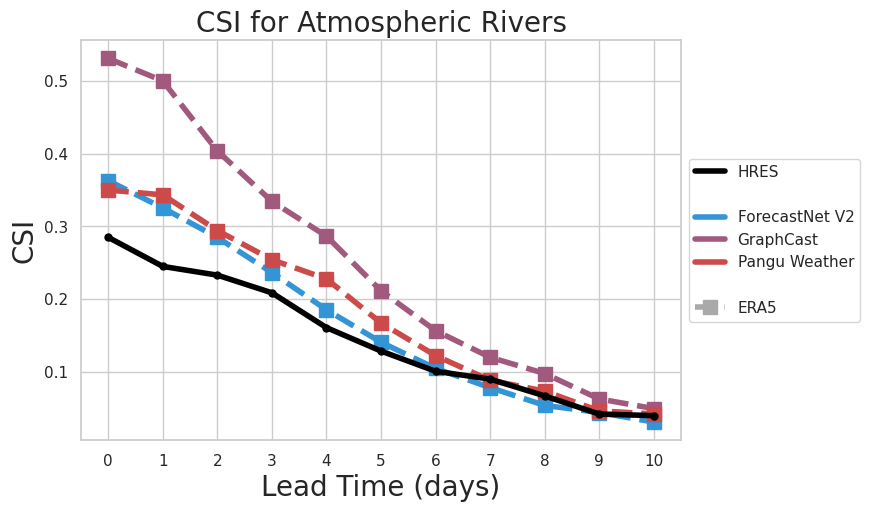

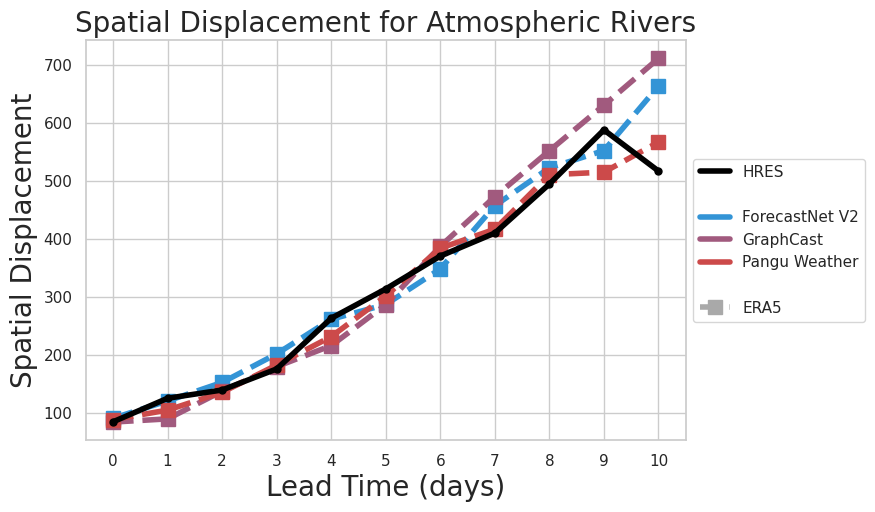

In [7]:
pp.plot_results_by_metric(data=ar_data_csi, settings=ar_settings_csi, 
    title='CSI for Atmospheric Rivers', show_all_in_legend=False, y_label='CSI')
pp.plot_results_by_metric(data=ar_data_sd, settings=ar_settings_sd, 
    title='Spatial Displacement for Atmospheric Rivers', 
    show_all_in_legend=False, y_label='Spatial Displacement')
# pp.plot_results_by_metric(data=severe_data_fn, settings=severe_settings_fn, 
#     title='False Negatives Local Storm Reports', show_all_in_legend=False)
# pp.plot_two_results_by_metric(data1=severe_data_tp, data2=severe_data_fn, 
#     settings1=severe_settings_tp, settings2=severe_settings_fn, 
#     y_label1='True Positives', y_label2='False Negatives',
#     title='Local Storm Reports', show_all_in_legend=False)


# analysis at the regional level

North America Cases: [1, 2, 3, 4, 5, 6, 27, 30, 31, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 84, 87, 88, 89, 95, 96, 97, 101, 102, 103, 104, 105, 106, 109, 110, 111, 112, 113, 114, 115, 118, 119, 121, 124, 126, 127, 128, 129, 130, 131, 132, 133, 134, 136, 137, 138, 139, 140, 141, 142, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 170, 172, 173, 174, 175, 176, 177, 178, 179, 180, 194, 195, 196, 197, 198, 199, 200, 201, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337]
Australia Ca

/home/amy/extreme-weather-bench-paper/src/plots/paper_plotting.py:740: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower left", fontsize=12)


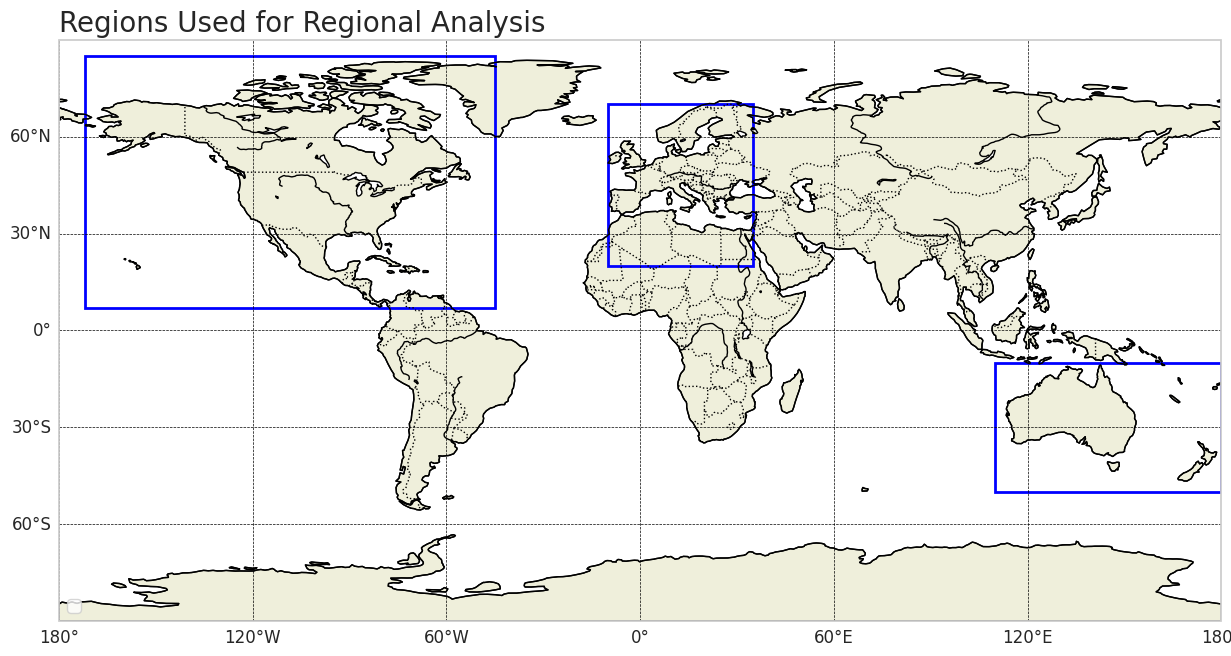

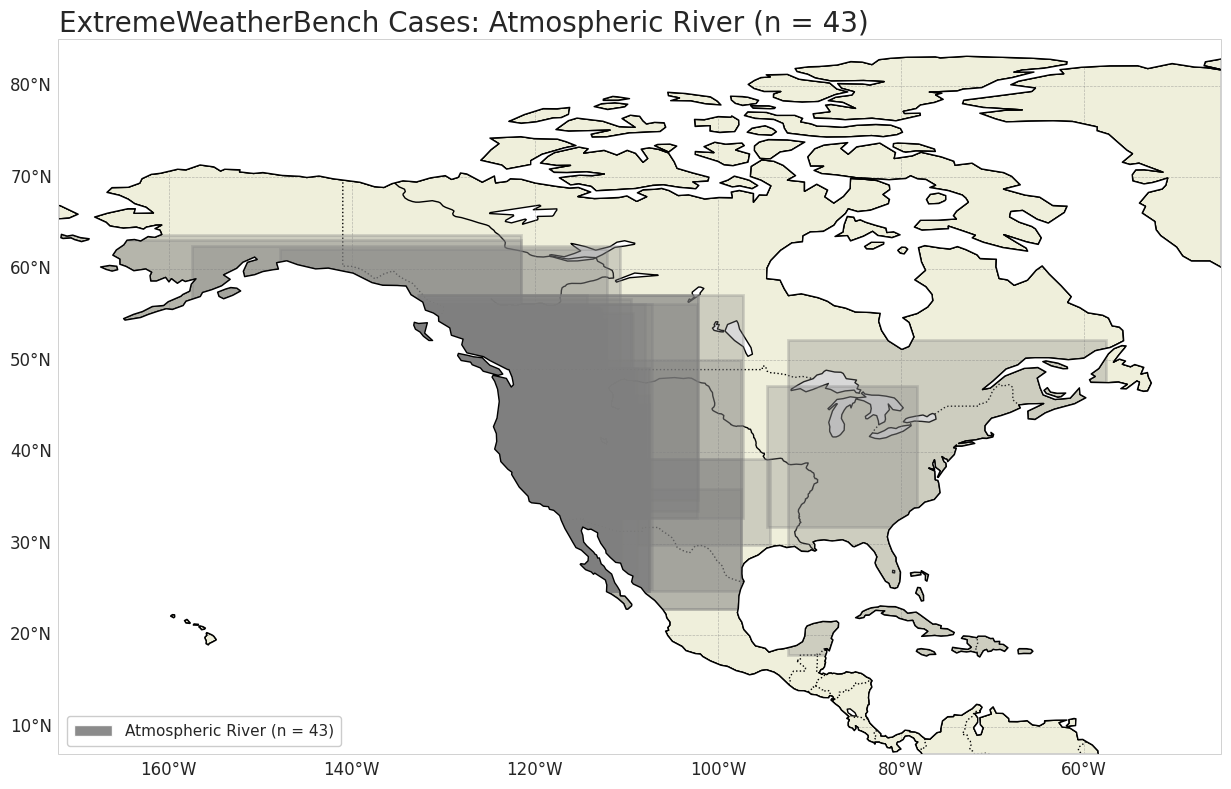

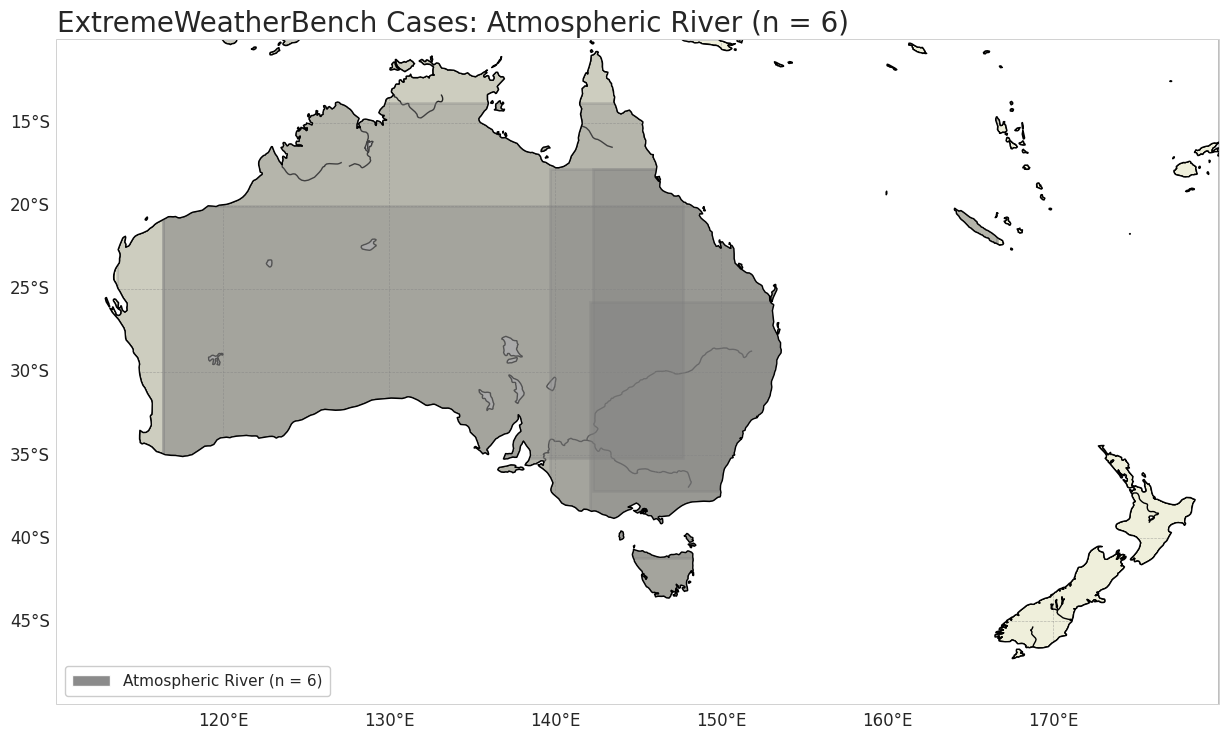

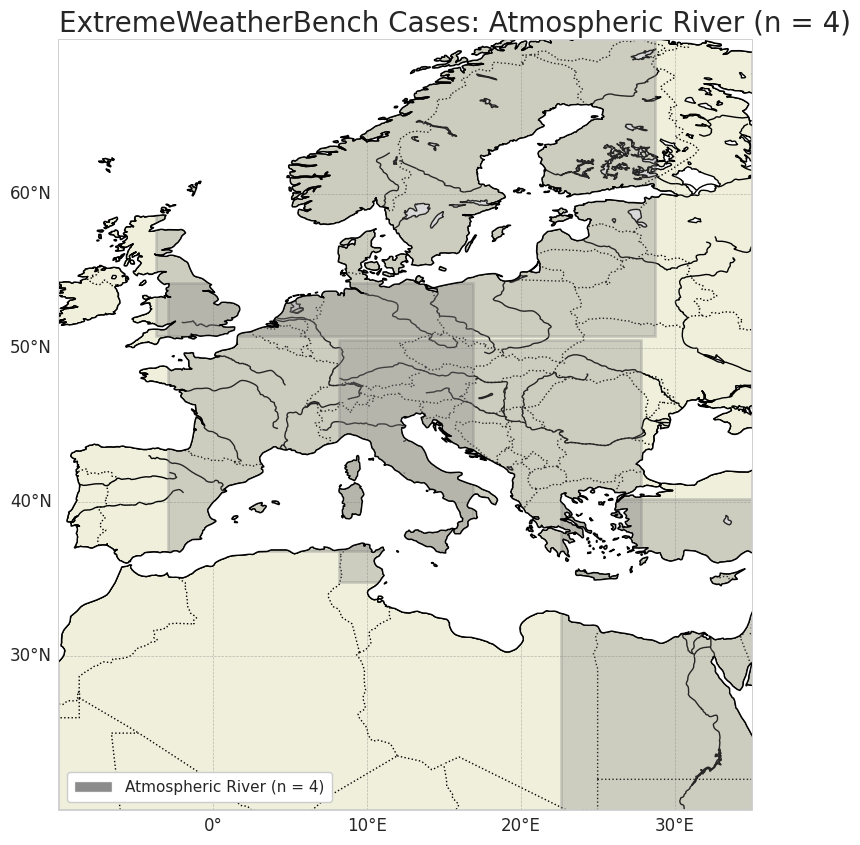

In [8]:
# make the bounding boxes for the regions

# North America
na_bounding_box = [-172, -45, 7, 85]
na_bounding_box_polygon = pp.get_polygon_from_bounding_box(na_bounding_box)
na_bounding_region = regions.BoundingBoxRegion(latitude_min=7, latitude_max=85, longitude_min=-172, longitude_max=-45)

# europe bounding box
eu_bounding_box = [-10, 35, 20, 70]
eu_bounding_box_polygon = pp.get_polygon_from_bounding_box(eu_bounding_box)
eu_bounding_region = regions.BoundingBoxRegion(latitude_min=20, latitude_max=70, longitude_min=-10, longitude_max=35)

# australia bounding box
au_bounding_box = [110, 180, -50, -10]
au_bounding_box_polygon = pp.get_polygon_from_bounding_box(au_bounding_box)
au_bounding_region = regions.BoundingBoxRegion(latitude_min=-50, latitude_max=-10, longitude_min=110, longitude_max=180)

# break the cases into different lists
na_subset = regions.RegionSubsetter(region=na_bounding_region, method='intersects').subset_case_collection(ewb_cases)
au_subset = regions.RegionSubsetter(region=au_bounding_region, method='intersects').subset_case_collection(ewb_cases)
eu_subset = regions.RegionSubsetter(region=eu_bounding_region, method='intersects').subset_case_collection(ewb_cases)
na_case_ids = [n.case_id_number for n in na_subset.cases]
au_case_ids = [n.case_id_number for n in au_subset.cases]
eu_case_ids = [n.case_id_number for n in eu_subset.cases]

print(f'North America Cases: {na_case_ids}')
print(f'Australia Cases: {au_case_ids}')
print(f'Europe Cases: {eu_case_ids}')

# plot the regions
pp.plot_boxes(
    box_list=[na_bounding_box_polygon, au_bounding_box_polygon, eu_bounding_box_polygon],
    box_names=['North America', 'Europe', 'Australia'],
    title='Regions Used for Regional Analysis',
)

# plot North America cases
pp.plot_all_cases(ewb_cases, event_type='atmospheric_river', bounding_box=na_bounding_box, 
    fill_boxes=True)

pp.plot_all_cases(ewb_cases, event_type='atmospheric_river', bounding_box=au_bounding_box, 
    fill_boxes=True)

pp.plot_all_cases(ewb_cases, event_type='atmospheric_river', bounding_box=eu_bounding_box, 
    fill_boxes=True)

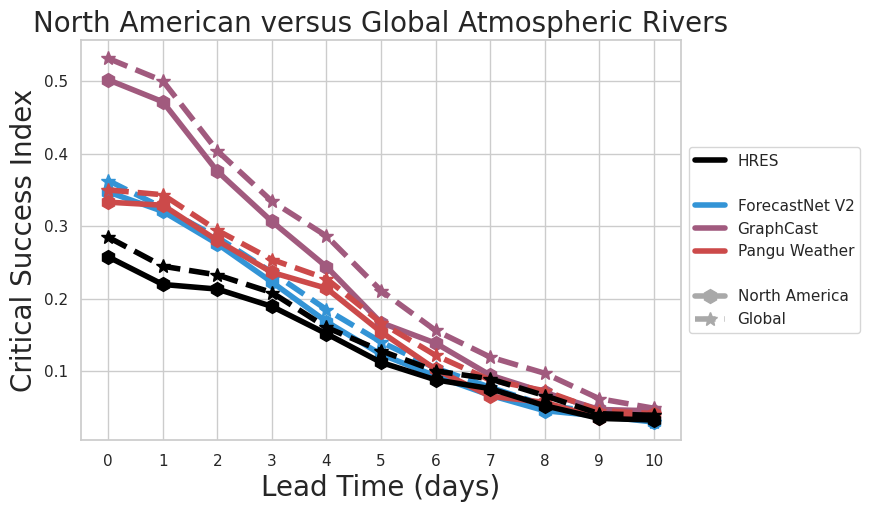

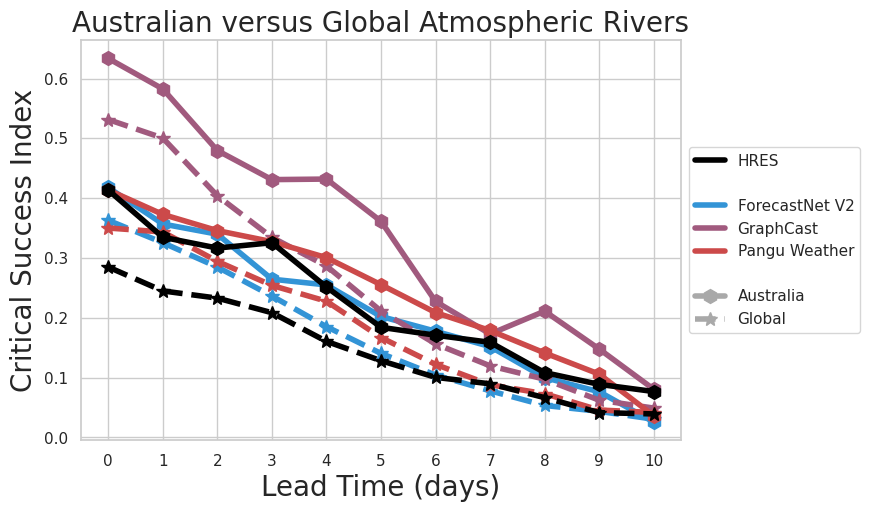

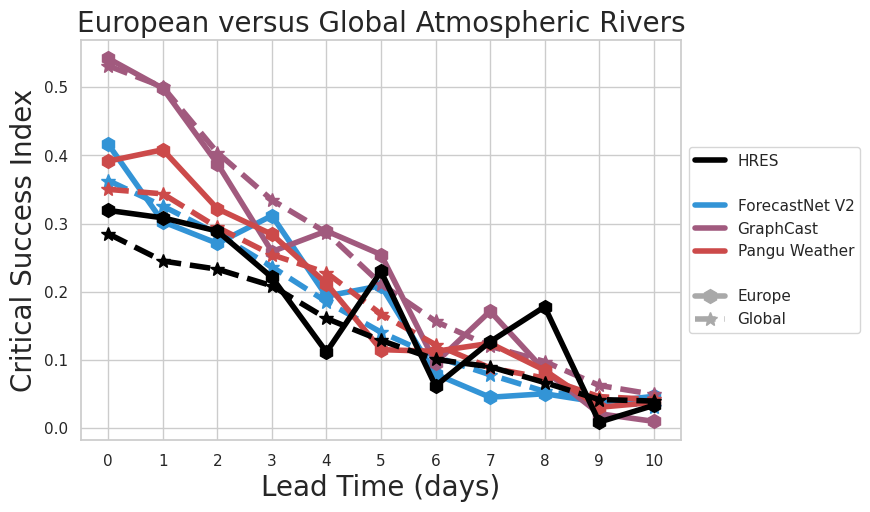

In [9]:
# create a group style for the local/global plots
na_group_style = {'linestyle':'-', 'marker':'h', 'group':'North America'}
au_group_style = {'linestyle':'-', 'marker':'h', 'group':'Australia'}
eu_group_style = {'linestyle':'-', 'marker':'h', 'group':'Europe'}
# plot the results for one metric for the three AI models versus HRES
na_fourv2_gfs_settings = fourv2_gfs_cira_settings | fourv2_style | na_group_style
na_gc_gfs_settings = gc_gfs_cira_settings | gc_style | na_group_style
na_pangu_gfs_settings = pangu_gfs_cira_settings | pangu_style | na_group_style
na_hres_settings = hres_ifs_settings | hres_style | na_group_style

au_fourv2_gfs_settings = fourv2_gfs_cira_settings | fourv2_style | au_group_style
au_gc_gfs_settings = gc_gfs_cira_settings | gc_style | au_group_style
au_pangu_gfs_settings = pangu_gfs_cira_settings | pangu_style | au_group_style
au_hres_settings = hres_ifs_settings | hres_style | au_group_style

eu_fourv2_gfs_settings = fourv2_gfs_cira_settings | fourv2_style | eu_group_style
eu_gc_gfs_settings = gc_gfs_cira_settings | gc_style | eu_group_style
eu_pangu_gfs_settings = pangu_gfs_cira_settings | pangu_style | eu_group_style
eu_hres_settings = hres_ifs_settings | hres_style | eu_group_style

# subset the data for the plots
na_fourv2_severe_plot_csi = pp.subset_results_to_xarray(results_df=fourv2_ar_results, 
    forecast_source=fourv2_gfs_cira_settings['forecast_source'], 
    target_source='ERA5', metric='CriticalSuccessIndex', init_time='zeroz',
    case_id_list=na_case_ids)
na_gc_severe_plot_csi = pp.subset_results_to_xarray(results_df=gc_ar_results, 
    forecast_source=gc_gfs_cira_settings['forecast_source'], 
    target_source='ERA5', metric='CriticalSuccessIndex', init_time='zeroz',
    case_id_list=na_case_ids)
na_pangu_severe_plot_csi  = pp.subset_results_to_xarray(results_df=pang_ar_results, 
    forecast_source=pangu_gfs_cira_settings['forecast_source'], 
    target_source='ERA5', metric='CriticalSuccessIndex', init_time='zeroz',
    case_id_list=na_case_ids)
na_hres_severe_plot_csi = pp.subset_results_to_xarray(results_df=hres_ar_results, 
    forecast_source=hres_ifs_settings['forecast_source'], 
    target_source='ERA5', metric='CriticalSuccessIndex', init_time='zeroz',
    case_id_list=na_case_ids)

# subset the data for the plots
au_fourv2_severe_plot_csi = pp.subset_results_to_xarray(results_df=fourv2_ar_results, 
    forecast_source=fourv2_gfs_cira_settings['forecast_source'], 
    target_source='ERA5', metric='CriticalSuccessIndex', init_time='zeroz',
    case_id_list=au_case_ids)
au_gc_severe_plot_csi = pp.subset_results_to_xarray(results_df=gc_ar_results, 
    forecast_source=gc_gfs_cira_settings['forecast_source'], 
    target_source='ERA5', metric='CriticalSuccessIndex', init_time='zeroz',
    case_id_list=au_case_ids)
au_pangu_severe_plot_csi  = pp.subset_results_to_xarray(results_df=pang_ar_results, 
    forecast_source=pangu_gfs_cira_settings['forecast_source'], 
    target_source='ERA5', metric='CriticalSuccessIndex', init_time='zeroz',
    case_id_list=au_case_ids)
au_hres_severe_plot_csi = pp.subset_results_to_xarray(results_df=hres_ar_results, 
    forecast_source=hres_ifs_settings['forecast_source'], 
    target_source='ERA5', metric='CriticalSuccessIndex', init_time='zeroz',
    case_id_list=au_case_ids)

# subset europe
eu_fourv2_severe_plot_csi = pp.subset_results_to_xarray(results_df=fourv2_ar_results, 
    forecast_source=fourv2_gfs_cira_settings['forecast_source'], 
    target_source='ERA5', metric='CriticalSuccessIndex', init_time='zeroz',
    case_id_list=eu_case_ids)
eu_gc_severe_plot_csi = pp.subset_results_to_xarray(results_df=gc_ar_results, 
    forecast_source=gc_gfs_cira_settings['forecast_source'], 
    target_source='ERA5', metric='CriticalSuccessIndex', init_time='zeroz',
    case_id_list=eu_case_ids)
eu_pangu_severe_plot_csi  = pp.subset_results_to_xarray(results_df=pang_ar_results, 
    forecast_source=pangu_gfs_cira_settings['forecast_source'], 
    target_source='ERA5', metric='CriticalSuccessIndex', init_time='zeroz',
    case_id_list=eu_case_ids)
eu_hres_severe_plot_csi = pp.subset_results_to_xarray(results_df=hres_ar_results, 
    forecast_source=hres_ifs_settings['forecast_source'], 
    target_source='ERA5', metric='CriticalSuccessIndex', init_time='zeroz',
    case_id_list=eu_case_ids)


# make a global settings so we can compare
fourv2_global_settings = fourv2_gfs_cira_settings | fourv2_style | global_group_style
pangu_global_settings = pangu_gfs_cira_settings | pangu_style | global_group_style
gc_global_settings = gc_gfs_cira_settings | gc_style | global_group_style
hres_global_settings = hres_ifs_settings | hres_style | global_group_style 

# plot the results
na_data = [na_fourv2_severe_plot_csi, fourv2_ar_plot_csi, na_gc_severe_plot_csi, 
    gc_ar_plot_csi, na_pangu_severe_plot_csi, pangu_ar_plot_csi, 
    na_hres_severe_plot_csi, hres_ar_plot_csi]
settings = [na_fourv2_gfs_settings, fourv2_global_settings, na_gc_gfs_settings, gc_global_settings, 
    na_pangu_gfs_settings, pangu_global_settings, na_hres_settings, hres_global_settings]
pp.plot_results_by_metric(data=na_data, settings=settings, 
    title='North American versus Global Atmospheric Rivers', y_label='Critical Success Index')

au_data = [au_fourv2_severe_plot_csi, fourv2_ar_plot_csi, au_gc_severe_plot_csi, gc_ar_plot_csi, 
    au_pangu_severe_plot_csi, pangu_ar_plot_csi, au_hres_severe_plot_csi, hres_ar_plot_csi]
settings = [au_fourv2_gfs_settings, fourv2_global_settings, au_gc_gfs_settings, gc_global_settings, 
    au_pangu_gfs_settings, pangu_global_settings, au_hres_settings, hres_global_settings]
pp.plot_results_by_metric(data=au_data, settings=settings, 
    title='Australian versus Global Atmospheric Rivers', y_label='Critical Success Index')

eu_data = [eu_fourv2_severe_plot_csi, fourv2_ar_plot_csi, eu_gc_severe_plot_csi, gc_ar_plot_csi, 
    eu_pangu_severe_plot_csi, pangu_ar_plot_csi, eu_hres_severe_plot_csi, hres_ar_plot_csi]
settings = [eu_fourv2_gfs_settings, fourv2_global_settings, eu_gc_gfs_settings, gc_global_settings, 
    eu_pangu_gfs_settings, pangu_global_settings, eu_hres_settings, hres_global_settings]
pp.plot_results_by_metric(data=eu_data, settings=settings, 
    title='European versus Global Atmospheric Rivers', y_label='Critical Success Index')



# dive into one example in depth

In [10]:
# loop through the results and find all the case studies that have non-zero results for each model
valid_case_ids = []
for case_id in hres_ar_results.case_id_number.unique():
    hres_subset = pp.subset_results_to_xarray(results_df=hres_ar_results, 
        forecast_source=hres_ifs_settings['forecast_source'], 
        target_source='ERA5', metric='CriticalSuccessIndex', init_time='zeroz', case_id_list=[case_id])
    if hres_subset.value.sum() > 0:
        #print(f'Case {case_id} has non-zero results for HRES')

        gc_subset = pp.subset_results_to_xarray(results_df=gc_ar_results, 
            forecast_source=gc_gfs_cira_settings['forecast_source'], 
            target_source='ERA5', metric='CriticalSuccessIndex', init_time='zeroz', case_id_list=[case_id])
        if gc_subset.value.sum() > 0:
            #print(f'Case {case_id} has non-zero results for GraphCast')

            pang_subset = pp.subset_results_to_xarray(results_df=pang_ar_results, 
                forecast_source=pangu_gfs_cira_settings['forecast_source'], 
                target_source='ERA5', metric='CriticalSuccessIndex', init_time='zeroz', case_id_list=[case_id])
            if pang_subset.value.sum() > 0:
                #print(f'Case {case_id} has non-zero results for Pangu')

                fourv2_subset = pp.subset_results_to_xarray(results_df=fourv2_ar_results, 
                    forecast_source=fourv2_gfs_cira_settings['forecast_source'], 
                    target_source='ERA5', metric='CriticalSuccessIndex', init_time='zeroz', case_id_list=[case_id])
                if fourv2_subset.value.sum() > 0:
                    #print(f'Case {case_id} has non-zero results for ForecastNet V2')

                    valid_case_ids.append(case_id)
                
print(valid_case_ids)

[112, 113, 114, 116, 117, 119, 120, 121, 122, 123, 124, 125, 127, 128]


In [11]:
# Define forecast (HRES)
hres_forecast = inputs.ZarrForecast(
    source="gs://weatherbench2/datasets/hres/2016-2022-0012-1440x721.zarr",
    name="ECMWF HRES",
    variables=[
        derived.AtmosphericRiverVariables()
    ],
    variable_mapping=inputs.HRES_metadata_variable_mapping,
)

cira_AR_FOURv2_GFSforecast = inputs.KerchunkForecast(
    source="gs://extremeweatherbench/FOUR_v200_GFS.parq",
    variables=[
        derived.AtmosphericRiverVariables(
            output_variables=["atmospheric_river_land_intersection"]
        )
    ],
    variable_mapping=inputs.CIRA_metadata_variable_mapping,
    storage_options={"remote_protocol": "s3", "remote_options": {"anon": True}},
    preprocess=defaults._preprocess_bb_ar_cira_forecast_dataset,
    name="CIRA FOURv2 GFS",
)

cira_AR_GC_GFSforecast = inputs.KerchunkForecast(
    source="gs://extremeweatherbench/GRAP_v100_GFS.parq",
    variables=[
        derived.AtmosphericRiverVariables(
            output_variables=["atmospheric_river_land_intersection"]
        )
    ],
    variable_mapping=inputs.CIRA_metadata_variable_mapping,
    storage_options={"remote_protocol": "s3", "remote_options": {"anon": True}},
    preprocess=defaults._preprocess_bb_ar_cira_forecast_dataset,
    name="CIRA GC GFS",
)

cira_AR_PANG_GFSforecast = inputs.KerchunkForecast(
    source="gs://extremeweatherbench/PANG_v100_GFS.parq",
    variables=[
        derived.AtmosphericRiverVariables(
            output_variables=["atmospheric_river_land_intersection"]
        )
    ],
    variable_mapping=inputs.CIRA_metadata_variable_mapping,
    storage_options={"remote_protocol": "s3", "remote_options": {"anon": True}},
    preprocess=defaults._preprocess_bb_ar_cira_forecast_dataset,
    name="CIRA PANG GFS",
)



In [12]:
def get_ivt(ewb_case, forecast_source):
    ivt = evaluate.run_pipeline(ewb_case, forecast_source)

    return ivt

In [17]:
# hres_graphics = dict()
gc_graphics = dict()
pang_graphics = dict()
fourv2_graphics = dict()
hres_graphics = dict()

my_ids = [112, 113, 114, 116, 117, 119, 120, 121, 122, 123, 124, 125, 127, 128]
my_ids = [112]

for my_id in my_ids:
    # compute CBSS and PPH for all the AI models and HRES for the case we chose
    print(my_id)
    my_case = ewb_cases.select_cases("case_id_number", my_id).cases[0]

    print("Computing IVT for HRES")
    ivt = get_ivt(my_case, hres_forecast)
    hres_graphics[my_id] = ivt


112
Computing IVT for HRES


In [22]:
hres_graphics[my_id].atmospheric_river_mask

<xarray.DataArray 'atmospheric_river_mask' (lead_time: 41, valid_time: 25,
                                            latitude: 97, longitude: 101)> Size: 80MB
array([[[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],

        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],

        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
...
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],

        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],

        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]]], shape=(41, 25, 97, 101))
Coordinates:
  * lead_time   (lead_time) timedelta64[ns] 328B 0 days 00:00:00 ... 10 days ...
  * valid_time  (valid_time) datetime64[ns] 200B 2023-01-04 ... 2023-01-10
  * latitude    (latitude) float32 388B 25.0 25.25 25.5 ... 48.5 48.75 49.0
  * longitude   (longitude) float32 404B 227.5 227.8 228.0 ... 252.0 252.2 252.5

Time dimension: valid_time


TypeError: Dimensions of C (41, 97, 101) should be one smaller than X(101) and Y(97) while using shading='flat' see help(pcolormesh)

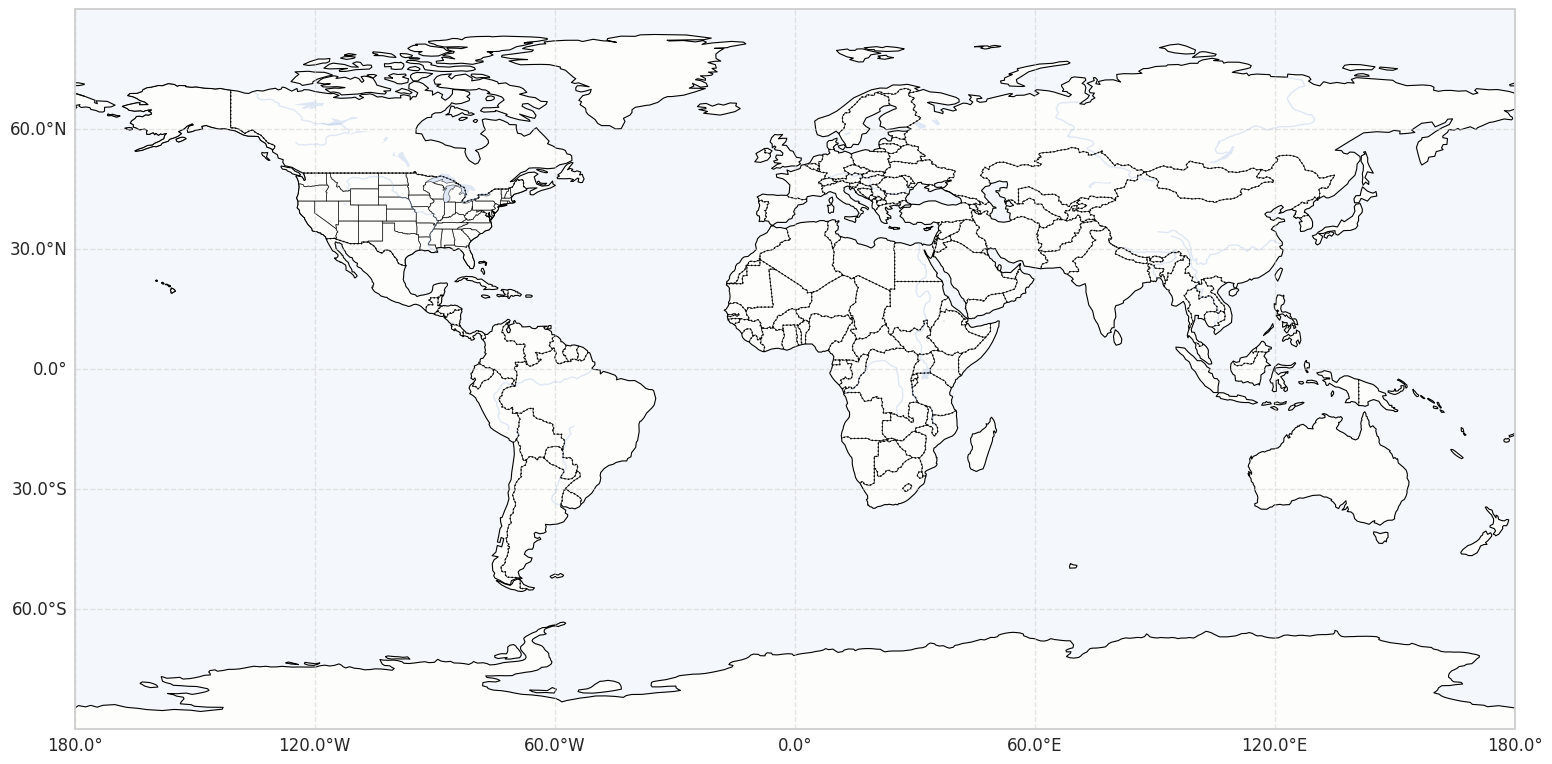

In [29]:
ar_plot.plot_ar_mask_animation(my_id, title="HRES Case id " + str(my_id), 
    ivt_data=hres_graphics[my_id].integrated_vapor_transport, 
    ar_mask=hres_graphics[my_id].atmospheric_river_mask)
